In [1]:
from utils import *
import pickle


# Load and organize data and models

In [2]:
# LOAD DATA

dct_scada = load_scada_data(data_path='./your/path_to/Wind-Turbine-SCADA-signals-xxx-files')
df_metmast = load_metmast_data(data_path='./your/path_to/20xx_WF1edp_metmast.csv-files')

with open('dct_data.pkl', 'rb') as file:
    dct_data_empty = pickle.load(file) 

dct_data = fill_dct_data(dct_data_empty, dct_scada, df_metmast)

filename = './your/path_to/dct_models.pkl'    
# Open the file in binary read mode and load the object
with open(filename, 'rb') as file:
    dct_models = pickle.load(file)
    print('... models loaded!')

Loading SCADA signals...
... data loaded, selected, and organized!
... models loaded!


# Make model predictions

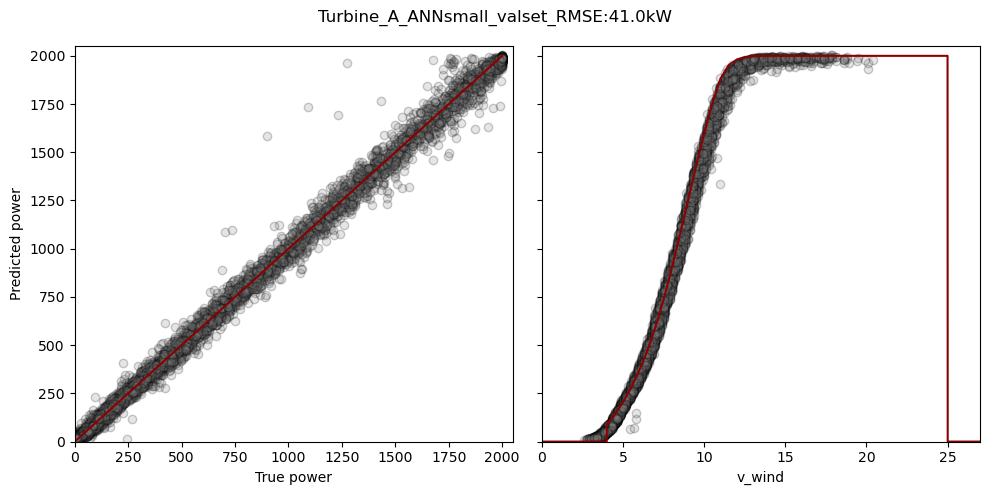

In [3]:
#####################################################################################
# Select turbine, model, dataset and model_number here
#####################################################################################

trb_ = "Turbine_A"  # {'Turbine_A', 'Turbine_B', 'Turbine_C', 'Turbine_D'}
model_ = 'ANNsmall' # {'ANNlarge', 'ANNsmall', 'PHYSbase', 'PLR', 'PPR', 'RF', 'SVR'}
set_ = 'val'        # {'train', 'val', 'test'}
i_model = 0         # {0...10} for 'ANNlarge', 'ANNsmall' & 'RF', else {0}

####################################################################################

model = dct_models[f'{trb_}_{model_}'][i_model]
X_, y = get_Xy(dct_data, trb_, set_, normalized=(model.__class__!=PHYSbase))
v_w = get_Xy(dct_data, trb_, set_, normalized=False)[0][:,0]

fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10,5))

y_pred = model.predict(X_)
rmse = np.sqrt(np.mean((y-y_pred)**2))

plt.suptitle(f'{trb_}_{model_}_{set_}set_RMSE:{np.round(rmse)}kW')

ax[0].scatter(y, y_pred , alpha=0.2, ec='k', c='grey')
ax[0].plot([0,2000], [0,2000], c='darkred')

ax[0].set_xlabel('True power'), ax[0].set_ylabel('Predicted power') 
ax[0].set_xlim(0,2050), ax[0].set_ylim(0,2050)

ax[1].scatter(v_w, y_pred, alpha=0.2, ec='k', c='grey')
ax[1].plot(dct_data[trb_]['df_pc'], c='darkred')
ax[1].set_xlabel('v_wind')
ax[1].set_xlim(0,27), ax[0].set_ylim(0,2050)

plt.tight_layout()

# Explain model predictions

In [4]:
df_exp = explain_model(model, X_)

100%|██████████████████████████████████████| 7015/7015 [00:07<00:00, 951.62it/s]


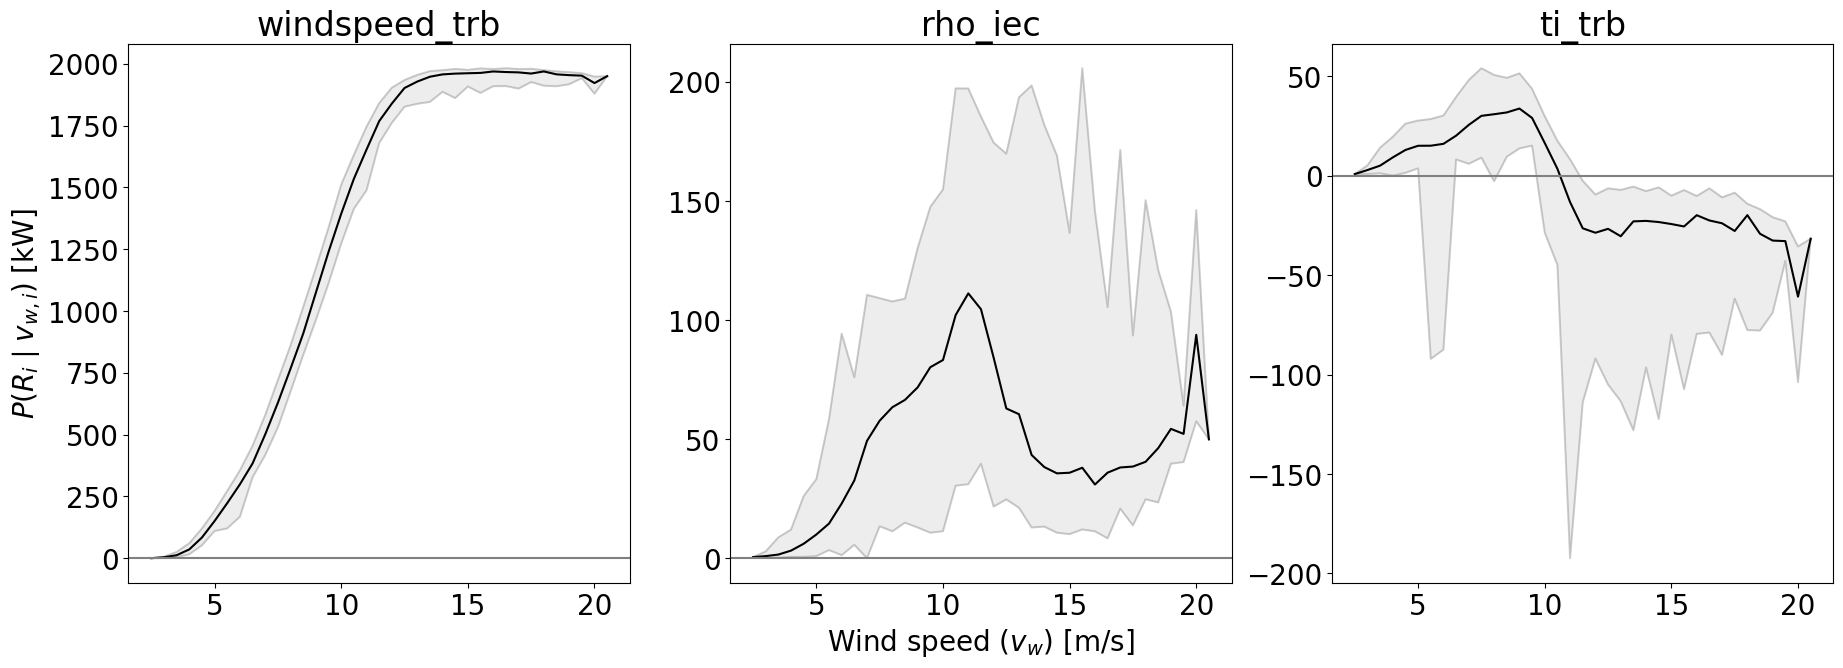

In [5]:
ax = plot_model_strategy(df_exp, v_w)

# Compare pre-computed model strategies

In [14]:
#from utils import PlotUpdater

# Assuming dct_models is defined or imported here
plot_updater = PlotUpdater(dct_models, dct_data)

display(plot_updater.layout)
display(plot_updater.output)

# Initial plot
plot_updater.update_plot(None)


Output()